In [1]:
import pandas as pd
import sys
from datetime import datetime

In [3]:
import master_function as mf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import pandas_datareader as pdr
from master_function import data_preprocessing, plot_train_test_values
from master_function import calculate_directional_accuracy
from sklearn.metrics import mean_squared_error

In [7]:
import sys

In [25]:
from master_function_MFPR import rsi, atr, ma, add_column, signal_chart_indicator_plot_candles, performance

In [10]:
import os
path = "../papertrading/datasets/"
for directory in os.listdir(path):
    print(path + directory)

../papertrading/datasets/BTCUSDT_1m_2024_03_01_2024_04_01.csv
../papertrading/datasets/SOLUSDT_1m_2023_01_01_2024_04_01.csv
../papertrading/datasets/BTCUSDT_1m_202303_202403.csv
../papertrading/datasets/ETHUSDT_1m_2023_01_01_2024_04_01.csv
../papertrading/datasets/BTCUSDT_1m_202201_202303.csv
../papertrading/datasets/AAPL.csv
../papertrading/datasets/BTCUSDT_1m_2024_02_01_2024_03_01.csv


In [11]:
df = pd.read_csv("../papertrading/datasets/BTCUSDT_1m_202303_202403.csv")
df.head()

,Datetime,open,high,low,close,volume
0,2023-02-28 23:00:00+00:00,23160.47,23161.38,23141.24,23143.25,282.02238
1,2023-02-28 23:01:00+00:00,23144.04,23152.88,23137.32,23143.54,167.94011
2,2023-02-28 23:02:00+00:00,23143.54,23152.12,23123.18,23143.52,410.11996
3,2023-02-28 23:03:00+00:00,23143.06,23157.34,23141.81,23151.08,223.82182
4,2023-02-28 23:04:00+00:00,23151.99,23153.67,23138.63,23146.11,179.56661


In [17]:
crypto = df.to_numpy()
crypto.shape
crypto = crypto[:, 1 : 5]
crypto.shape
crypto

array([[23160.47, 23161.38, 23141.24, 23143.25],
       [23144.04, 23152.88, 23137.32, 23143.54],
       [23143.54, 23152.12, 23123.18, 23143.52],
       ...,
       [70779.99, 70780.0, 70779.99, 70779.99],
       [70780.0, 70780.0, 70720.59, 70730.95],
       [70725.18, 70856.0, 70725.18, 70856.0]], dtype=object)

Hit Ratio         =  51.22952629023001
Profit factor     =  0.95
Realized RR       =  0.9
Number of Trades  =  22651


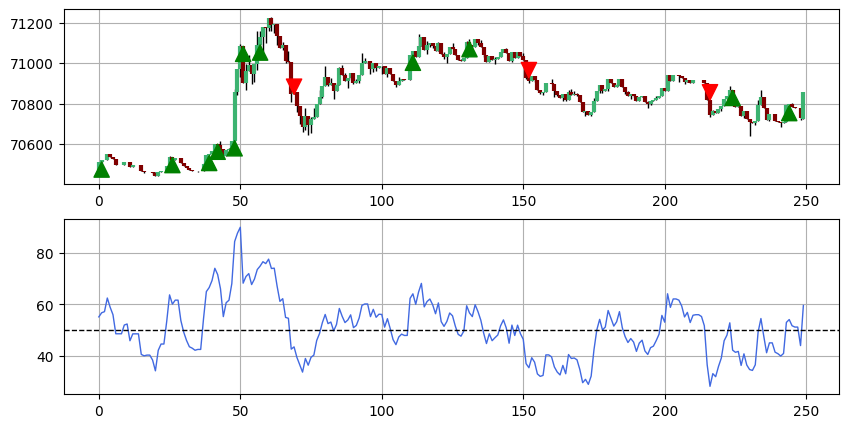

In [26]:
# Choosing the asset

pair = 0

# Time Frame
lookback = 10
lookback_rsi = 14

# Importing the asset as an array
my_data = crypto
# Calculating the ATR
my_data = atr(my_data, lookback, 1, 2, 3, 4)
my_data = rsi(my_data, lookback_rsi, 3, 5)


# Creating the signal function
def signal(data, open_column, high_column, low_column, close_column, atr_column, rsi_column, buy_column, sell_column):

    data = add_column(data, 5)    
    
    for i in range(len(data)):  
        
       try:
           
           # Bullish pattern
           if data[i, close_column] > data[i, open_column] and \
              data[i, close_column] > data[i - 1, close_column] and \
              data[i - 1, close_column] > data[i - 1, open_column] and \
              data[i, high_column] - data[i, low_column] > (2 * data[i - 1, atr_column]) and \
              data[i, close_column] - data[i, open_column] > data[i - 1, close_column] - data[i - 1, open_column] and \
              data[i, buy_column] == 0 and \
              data[i, rsi_column] > 50:
                  
                    data[i + 1, buy_column] = 1 
                    
           # Bearish pattern
           elif data[i, close_column] < data[i, open_column] and \
              data[i, close_column] < data[i - 1, close_column] and \
              data[i - 1, close_column] < data[i - 1, open_column] and \
              data[i, high_column] - data[i, low_column] > (2 * data[i - 1, atr_column]) and \
              data[i, open_column] - data[i, close_column] > data[i - 1, open_column] - data[i - 1, close_column] and \
              data[i, sell_column] == 0 and \
              data[i, rsi_column] < 50:
                  
                    data[i + 1, sell_column] = -1 
                    
       except IndexError:
            
            pass
        
    return data

# Calling the signal function
my_data = signal(my_data, 0, 1, 2, 3, 4, 5, 6, 7)

# Charting the latest signals
signal_chart_indicator_plot_candles(my_data, 
                                    0, 
                                    5, 
                                    6, 
                                    7, 
                                    barriers = False,  
                                    window = 250)
plt.axhline(y = 50, color = 'black', linewidth = 1, linestyle = 'dashed')

# Performance
my_data = performance(my_data, 0, 6, 7, 8, 9, 10)

In [34]:
import pandas as pd
import numpy as np

# Create a sample DataFrame with random data
np.random.seed(0)  # For reproducibility
df = pd.DataFrame({
    'data': np.random.randn(100)  # 1000 random numbers
})

# Calculate the moving average with a window of 100 values
df['moving_average'] = df['data'].rolling(window=100).mean()

print(df.head(150))  # Printing the first 150 rows to see some of the moving averages


        data  moving_average
0   1.764052             NaN
1   0.400157             NaN
2   0.978738             NaN
3   2.240893             NaN
4   1.867558             NaN
..       ...             ...
95  0.706573             NaN
96  0.010500             NaN
97  1.785870             NaN
98  0.126912             NaN
99  0.401989        0.059808

[100 rows x 2 columns]


In [36]:
df['moving_average'][97:100]

97         NaN
98         NaN
99    0.059808
Name: moving_average, dtype: float64